In [31]:
## Machine Learning Lab-2 (02/02/2021)
## Decision Tree Classification

### Name: K V Sumanth Reddy
## Roll No: 181CO225

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn import preprocessing, metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [33]:
#Loading Data and cleaning NULL values in the dataset

df=pd.read_csv('/home/sumanth/Documents/181CO225.02-02/titanic.csv')

m = df['Age'].mean()
df['Age'] = df['Age'].replace(np.nan, round(m))
df['Embarked'] = df['Embarked'].replace(np.nan, 'Q')
df= df.drop(['Cabin'], axis=1)
df.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.758889,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002570,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,30.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [34]:
# Label Encoding the values
le = LabelEncoder()
df["Sex"] = le.fit_transform(df["Sex"].values)

# Droping the Ticket column and converting Name to numerical form
df = df.drop(['Ticket'], axis=1)
df["Embarked"] = le.fit_transform(df["Embarked"].values)
df["Name"] = le.fit_transform(df["Name"].values)

In [35]:
from sklearn.preprocessing import MinMaxScaler

#Splitting into train, test sets
features = ["PassengerId","Pclass","Sex","Age","SibSp","Parch","Fare","Embarked"]
X = df[features]
y = df['Survived']

# Cross validation
X_train,X_test, y_train,y_test = train_test_split(X, y, test_size = 0.20)

sc_X = MinMaxScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

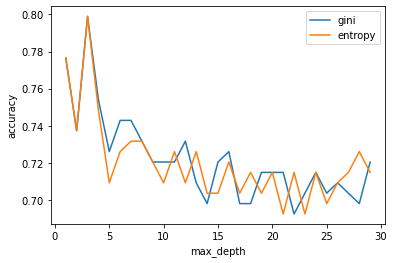

In [36]:
# We apply pruning to get better accuracies

max_depth = []
acc_gini = []
acc_entropy = []
for i in range(1,30):
 dtree = DecisionTreeClassifier(criterion='gini', max_depth=i)
 dtree.fit(X_train, y_train)
 pred = dtree.predict(X_test)
 acc_gini.append(accuracy_score(y_test, pred))
 
 dtree = DecisionTreeClassifier(criterion='entropy', max_depth=i)
 dtree.fit(X_train, y_train)
 pred = dtree.predict(X_test)
 acc_entropy.append(accuracy_score(y_test, pred))
 
 max_depth.append(i)
d = pd.DataFrame({'acc_gini':pd.Series(acc_gini), 
 'acc_entropy':pd.Series(acc_entropy),
 'max_depth':pd.Series(max_depth)})

# Visualizing changes in the parameters
plt.plot('max_depth','acc_gini', data=d, label='gini')
plt.plot('max_depth','acc_entropy', data=d, label='entropy')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.legend()

In [37]:
#We can change the max_depth of the tree as per our choice, I've selected it to be 5


#id3 classification using information gain
ID3 = DecisionTreeClassifier(criterion='entropy',max_depth = 5)
ID3.fit(X_train, y_train)

#CART classification using gini index
CART = DecisionTreeClassifier(criterion='gini',max_depth = 5)
CART.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

Decision Tree ID3 Classifier: 
-----------------------------------------------------
              precision    recall  f1-score   support

           0       0.77      0.79      0.78       114
           1       0.61      0.58      0.60        65

    accuracy                           0.72       179
   macro avg       0.69      0.69      0.69       179
weighted avg       0.71      0.72      0.71       179

-----------------------------------------------------
Accuracy:  71.50837988826815


[Text(382.0029069767442, 747.4499999999999, 'X[2] <= 0.5\nentropy = 0.964\nsamples = 712\nvalue = [435, 277]'),
 Text(199.5174418604651, 611.55, 'X[1] <= 0.75\nentropy = 0.81\nsamples = 253\nvalue = [63, 190]'),
 Text(77.86046511627907, 475.65, 'X[6] <= 0.057\nentropy = 0.316\nsamples = 140\nvalue = [8, 132]'),
 Text(38.93023255813954, 339.74999999999994, 'X[0] <= 0.054\nentropy = 0.497\nsamples = 55\nvalue = [6, 49]'),
 Text(19.46511627906977, 203.8499999999999, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(58.395348837209305, 203.8499999999999, 'X[3] <= 0.692\nentropy = 0.445\nsamples = 54\nvalue = [5, 49]'),
 Text(38.93023255813954, 67.94999999999993, 'entropy = 0.386\nsamples = 53\nvalue = [4, 49]'),
 Text(77.86046511627907, 67.94999999999993, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(116.79069767441861, 339.74999999999994, 'X[3] <= 0.026\nentropy = 0.161\nsamples = 85\nvalue = [2, 83]'),
 Text(97.32558139534885, 203.8499999999999, 'entropy = 0.0\nsamples = 1\nval

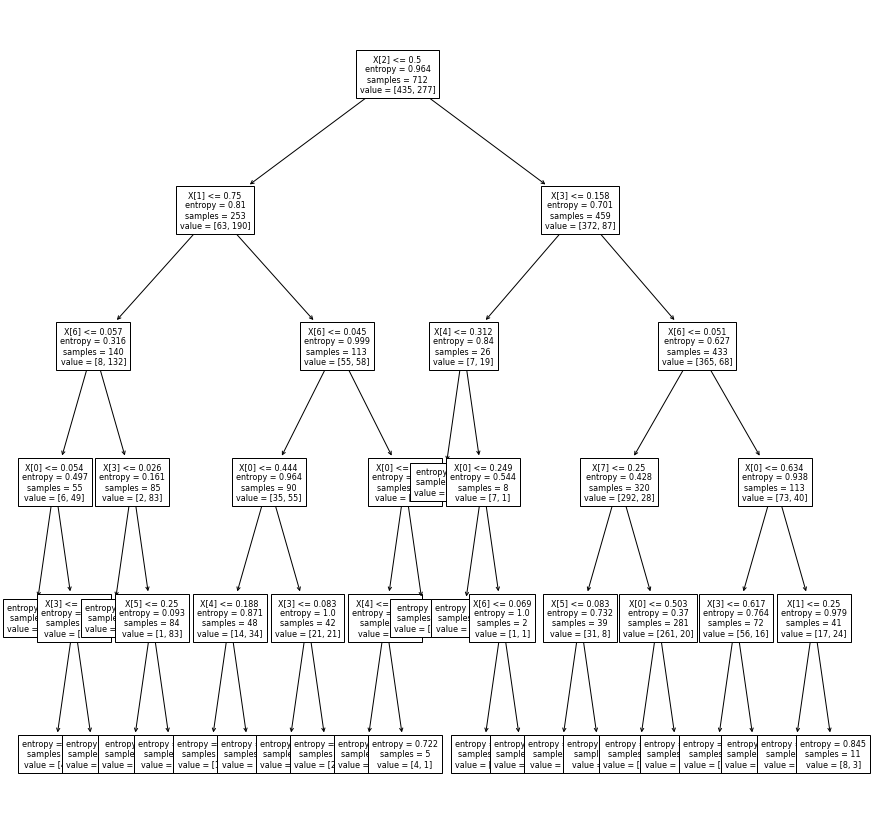

In [38]:
print("Decision Tree ID3 Classifier: ")
y_predID3 = ID3.predict(X_test)
print('-----------------------------------------------------')
print(classification_report(y_test, y_predID3))
print('-----------------------------------------------------')
print('Accuracy: ', (accuracy_score(y_test, y_predID3) * 100))

plt.figure(figsize=(15,15))
plot_tree(ID3,fontsize=8)

Decision Tree CART Classifier: 
-----------------------------------------------------
              precision    recall  f1-score   support

           0       0.77      0.81      0.79       114
           1       0.63      0.58      0.61        65

    accuracy                           0.73       179
   macro avg       0.70      0.70      0.70       179
weighted avg       0.72      0.73      0.72       179

-----------------------------------------------------
Accuracy:  72.62569832402235


[Text(398.4654255319149, 747.4499999999999, 'X[2] <= 0.5\ngini = 0.475\nsamples = 712\nvalue = [435, 277]'),
 Text(209.25, 611.55, 'X[1] <= 0.75\ngini = 0.374\nsamples = 253\nvalue = [63, 190]'),
 Text(80.13829787234042, 475.65, 'X[3] <= 0.026\ngini = 0.108\nsamples = 140\nvalue = [8, 132]'),
 Text(35.61702127659574, 339.74999999999994, 'X[5] <= 0.25\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(17.80851063829787, 203.8499999999999, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(53.42553191489361, 203.8499999999999, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(124.6595744680851, 339.74999999999994, 'X[6] <= 0.057\ngini = 0.096\nsamples = 138\nvalue = [7, 131]'),
 Text(89.04255319148936, 203.8499999999999, 'X[0] <= 0.054\ngini = 0.198\nsamples = 54\nvalue = [6, 48]'),
 Text(71.23404255319149, 67.94999999999993, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(106.85106382978722, 67.94999999999993, 'gini = 0.171\nsamples = 53\nvalue = [5, 48]'),
 Text(160.27659574468083, 203

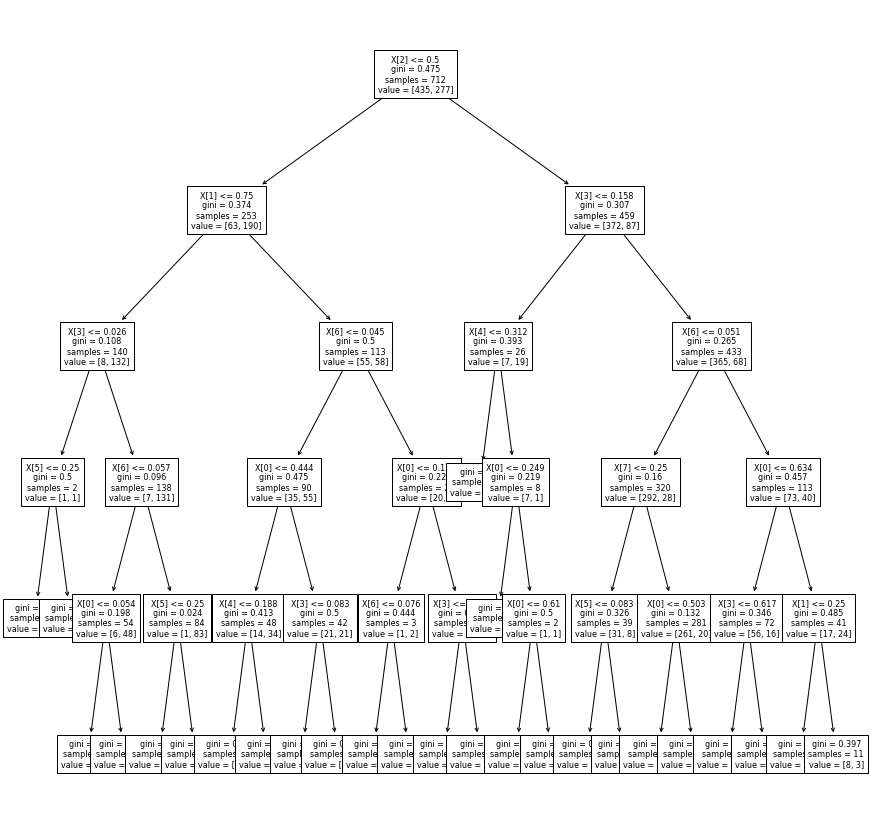

In [39]:
print("Decision Tree CART Classifier: ")
y_predCART = CART.predict(X_test)
print('-----------------------------------------------------')
print(classification_report(y_test, y_predCART))
print('-----------------------------------------------------')
print('Accuracy: ', (accuracy_score(y_test, y_predCART) * 100))

plt.figure(figsize=(15,15))
plot_tree(CART,fontsize=8)